# Analysez des données de systèmes éducatifs

## Import

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
from skimpy import skim
import plotly.express as px
import json
import requests
from bs4 import BeautifulSoup
import pycountry
import seaborn as sns

## Création des DataFrame

In [4]:
country_series = pd.read_csv("data/EdStatsCountry-Series.csv", sep=",", low_memory=False)
country = pd.read_csv("data/EdStatsCountry.csv", sep=",", low_memory=False)
ed_data = pd.read_csv("data/EdStatsData.csv", sep=",", low_memory=False)
foot_note = pd.read_csv("data/EdStatsFootNote.csv", sep=",", low_memory=False)
ed_series = pd.read_csv("data/EdStatsSeries.csv", sep=",", low_memory=False)

In [5]:
country_series = country_series.copy()
country = country.copy()
ed_data = ed_data.copy()
foot_note = foot_note.copy()
ed_series = ed_series.copy()


### Afficher les 5 premières lignes des DF

In [4]:
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
ed_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
foot_note.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
ed_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse de country_series

### Description de chaque ligne

In [9]:
country_series_info = country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CountryCode : le code indicatif de chaque pays  
SeriesCodes : le code Série de chaque pays  
DESCRIPTION : source des données  
Unnamed : aucune info, rempli de NaN  

In [10]:
country_series.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [11]:
country_series.shape

(613, 4)

Le DF country_series à 613 lignes & 4 colonnes

### Calcul du nombre de doublons

In [12]:
country_series.duplicated().sum()

0

Le DF ne semble pas contenir de doublons, mais comme vu avec head(5), nous avons pu voir des doublons dans **CountryCode** , regardons cela plus en détails :

In [13]:
country_series.loc[country_series['CountryCode'].duplicated(keep=False),:]

,CountryCode,SeriesCode,Description,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


On remarque que certains pays ont **deux SeriesCode**. La question qui se pose alors est : Qu'est ce qu'un **SeriesCode** ?

La colonne SeriesCode (ex. : SP.POP.TOTL) représente l’**indicateur statistique** que la ligne décrit.

C’est un code unique utilisé pour identifier une série temporelle : population, PIB, CO₂, scolarisation, etc.

Listons maintenant tous les SeriesCode existant dans le DF, pour voir lesquels sont inutiles.

In [14]:
country_series['SeriesCode'].value_counts()

SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

### Valeurs manquantes

In [15]:
skim(country_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 613    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Unnamed: 3        │    613 │     100 │     nan │   nan │   nan │   nan │   nan │   nan │    nan │          │  │
│ └───────────────────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                      613 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                      613 │  │
│ │ Description               │       0 │          0 │                          7.5 │                     4587 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

/tmp/ipykernel_24331/2057081411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


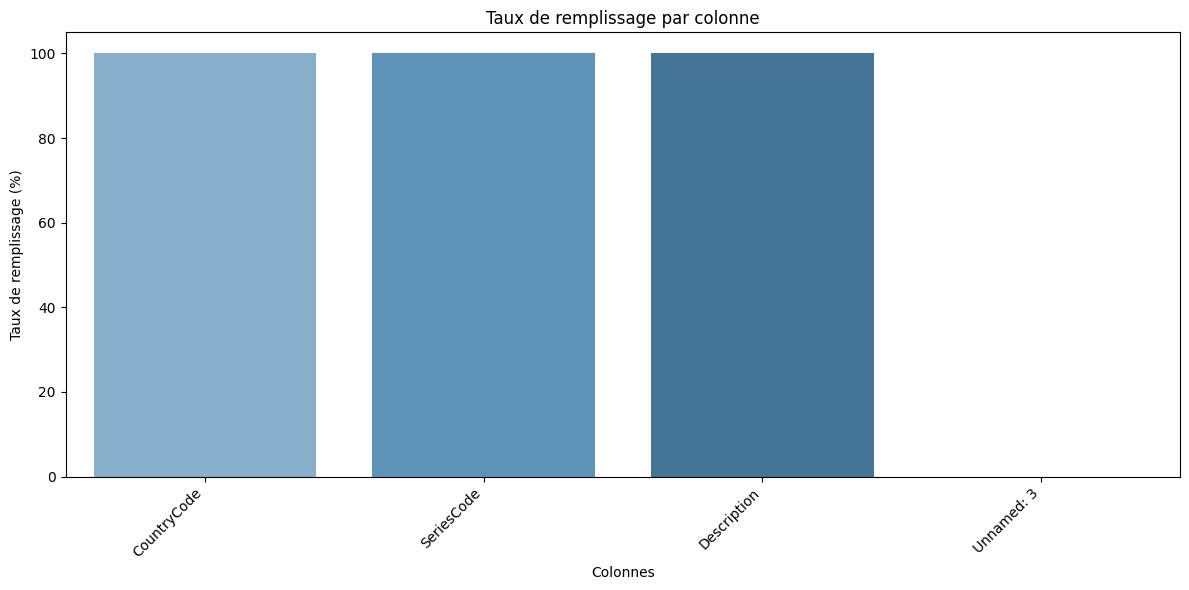

In [16]:
# 1. Calcul du taux de remplissage
taux = (country_series.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


On remarque que les colonnes *CountryCode*, *SeriesCode*, et *DESCRIPTION* sont totalement remplies.  
La colonne *Unnamed :3* est totalement vide, on peut donc la supprimer.

In [17]:
country_series_filtered = country_series.drop("Unnamed: 3", axis=1)

In [18]:
country_series_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Description'], dtype='object')

La colonne * Unnamed :3*  a bien été supprimée.

In [19]:
country_series_filtered.describe().T

,count,unique,top,freq
CountryCode,613,211,GEO,18
SeriesCode,613,21,SP.POP.TOTL,211
Description,613,97,Data sources : United Nations World Population...,154


In [20]:
country_series_filtered.value_counts("CountryCode")

CountryCode
GEO    18
MDA    18
TZA    12
MAR    12
MUS    12
       ..
IRQ     2
ISL     2
ISR     2
ITA     2
HRV     2
Name: count, Length: 211, dtype: int64

In [21]:
country_series_filtered.value_counts("SeriesCode")

SeriesCode
SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
Name: count, dtype: int64

In [22]:
country_series_filtered.value_counts("Description")

Description
Data sources : United Nations World Population Prospects                                                                          154
Data sources: United Nations World Population Prospects                                                                           137
Estimates are based on regression.                                                                                                 84
Data sources : Eurostat                                                                                                            54
Derived using ratio of age group from WPP and World Bank population.                                                               24
                                                                                                                                 ... 
Data sources : Statistics Greenland                                                                                                 1
Data sources : Statistics Canada                  

## Analyse de country

### Description de chaque ligne

In [23]:
country_info = country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

CountryCode : le code indicatif de chaque pays  
SeriesCodes : le code Série de chaque pays  
DESCRIPTION : source des données  
Unnamed : aucune info, rempli de NaN  

### Nombre de lignes & colonnes 

In [24]:
country.shape

(241, 32)

Le DF country à *241 lignes* &  *32 colonnes*

### Calcul du nombre de doublons

In [25]:
country.duplicated().sum()

0

In [26]:
country.loc[country['Country Code'].duplicated(keep=False),:]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [27]:
skim(country)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 241    │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 32     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ National accounts        │  209 │  86.72 │  2002 │  5.249 │  1987 │  1997 │  2002 │  2005 │  2012 │ ▁▁▅▆▇▁ │  │
│ │ reference year           │      │        │       │        │       │       │       │       │       │        │  │
│ │ Latest industrial data   │  134 │   55.6 │  2008 │  2.617 │  2000 │  2008 │  2009 │  2010 │  2010 │ ▁▁ ▁▂▇ │  │
│ │ Latest trade data        │   56 │  23.24 │  2011 │   2.57 │  1995 │  2011 │  2012 │  2012 │  2012 │     ▁▇ │  │
│ │ Unnamed: 31              │  241 │    100 │   nan │    nan │   nan │   nan │   nan │   nan │   nan │        │  │
│ └──────────────────────────┴──────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country Code                        │       0 │          0 │                       1 │                 241 │  │
│ │ Short Name                          │       0 │          0 │                     1.7 │                 401 │  │
│ │ Table Name                          │       0 │          0 │                     1.7 │                 404 │  │
│ │ Long Name                           │       0 │          0 │                     3.2 │                 777 │  │
│ │ 2-alpha code                        │       3 │       1.24 │                    0.99 │                 238 │  │
│ │ Currency Unit                       │      26 │      10.79 │                     1.9 │                 453 │  │
│ │ Special Notes                       │      96 │      39.83 │                      17 │                4082 │  │
│ │ Region                              │      27 │       11.2 │                     3.1 │                 759 │  │
│ │ Income Group                        │      27 │       11.2 │                     2.5 │                 608 │  │
│ │ WB-2 code                           │       1 │       0.41 │                       1 │                 240 │  │
│ │ National accounts base year         │      36 │      14.94 │                     1.6 │                 390 │  │
│ │ SNA price valuation                 │      44 │      18.26 │                     4.9 │                1182 │  │
│ │ Lending category                    │      97 │     

On peut supposer que les colonnes remplies à moins de 50% ne sont pas exploitables

In [28]:
country = country.loc[:, country.notnull().mean() >= 0.5]

In [29]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'SNA price valuation',
       'Lending category', 'System of National Accounts', 'PPP survey year',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Latest agricultural census', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [30]:
country.shape

(241, 26)

Le DF country n'a plus que 26 colonnes, 8 d'entre elles ont été supprimées.

In [31]:
country.describe()

,Latest trade data
count,185.000000
mean,2010.994595
std,2.569675
min,1995.000000
25%,2011.000000
50%,2012.000000
75%,2012.000000
max,2012.000000


In [32]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Latest agricultural census,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",2013/14,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",2015,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,2012,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,NaN,2006.0,NaN


Comme nous avons les **CountryCode**, les colonnes **ShortName**, **Table Name**, **Long Name** et **2-alphacode** n'ont pas d'utilité pour notre analyse

In [33]:
country.rename(columns={'Short Name': 'Country Name'}, inplace=True)

In [34]:
useless_columns = ['Table Name', 'Long Name', '2-alpha code', 'Currency Unit']

In [35]:
country_filtered = country.drop(columns=useless_columns)

In [36]:
country_filtered.head(5)

,Country Code,Country Name,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,System of National Accounts,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Latest agricultural census,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),NaN,Country uses the 1993 System of National Accou...,...,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),IDA,Country uses the 1993 System of National Accou...,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",2013/14,2012.0,2000
2,AGO,Angola,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),IBRD,Country uses the 1993 System of National Accou...,...,Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",2015,NaN,2005
3,ALB,Albania,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),IBRD,Country uses the 1993 System of National Accou...,...,Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,2012,2012.0,2006
4,AND,Andorra,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,Country uses the 1968 System of National Accou...,...,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,NaN,2006.0,NaN


In [37]:
# Sélectionner seulement les colonnes numériques
country_num = country_filtered.select_dtypes(include='number')

# Calcul de la matrice de corrélation
country_correlation_matrix = country_num.corr(method='pearson')

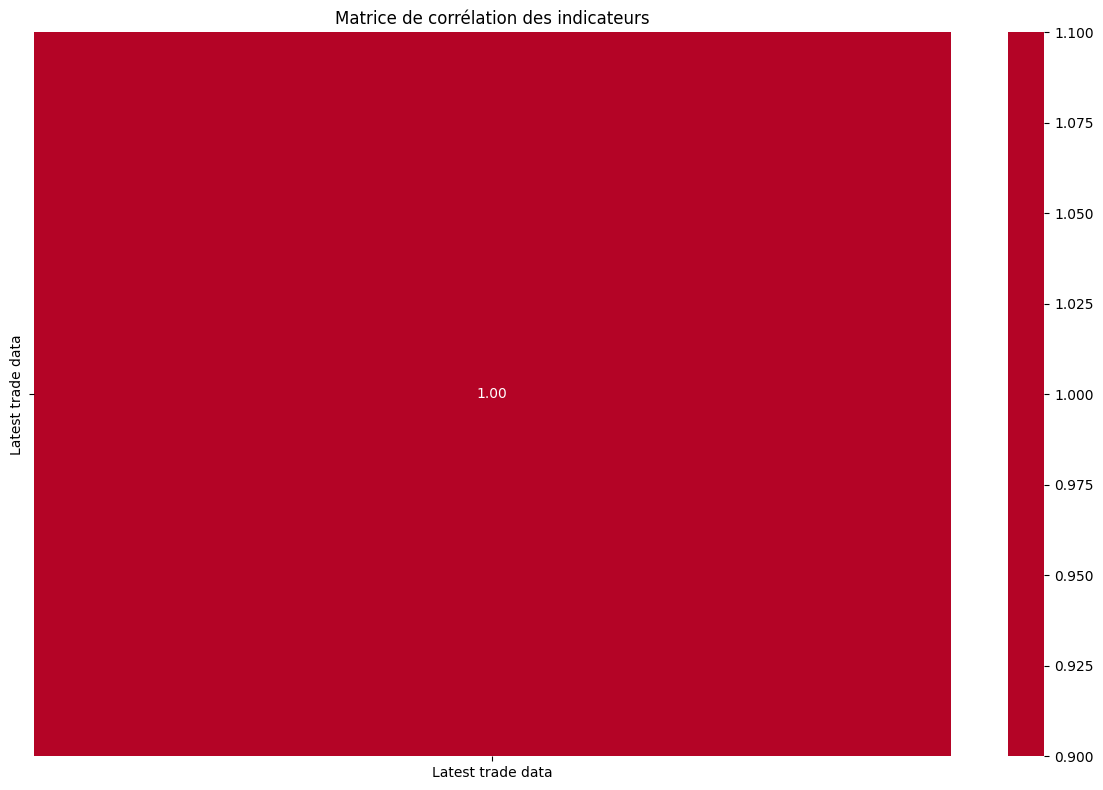

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(country_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation des indicateurs")
plt.tight_layout()
plt.show()

## Analyse de ed_data

### Description de chaque ligne

In [39]:
ed_data_info = ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

CountryName : le nom de chaque pays
CountryCode : le code indicatif de chaque pays  
IndicateurName : le code de chaque indicateur de pays   
IndicateurCode : le code Indicateur de chaque pays  
1970 - 2100 : Années sur lesquelles les données ont été calculées    
Unnamed 69 : aucune info

In [40]:
ed_data.value_counts("Country Name")

Country Name
Zimbabwe                3665
Afghanistan             3665
Ukraine                 3665
United Arab Emirates    3665
United Kingdom          3665
                        ... 
Angola                  3665
Antigua and Barbuda     3665
Arab World              3665
Argentina               3665
Armenia                 3665
Name: count, Length: 242, dtype: int64

In [41]:
ed_data.value_counts("Country Code")

Country Code
ZWE    3665
ABW    3665
URY    3665
USA    3665
UZB    3665
       ... 
ARB    3665
ARE    3665
ARG    3665
ARM    3665
ASM    3665
Name: count, Length: 242, dtype: int64

In [42]:
ed_data.value_counts("Indicator Code")

Indicator Code
XGDP.56.FSGOV.FDINSTADM.FFD    242
BAR.NOED.1519.FE.ZS            242
BAR.NOED.1519.ZS               242
BAR.NOED.15UP.FE.ZS            242
BAR.NOED.15UP.ZS               242
                              ... 
BAR.NOED.5559.FE.ZS            242
BAR.NOED.5559.ZS               242
BAR.NOED.6064.FE.ZS            242
BAR.NOED.6064.ZS               242
BAR.NOED.6569.FE.ZS            242
Name: count, Length: 3665, dtype: int64

In [43]:
ed_data.value_counts("Indicator Name")

Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                  242
Adjusted net enrolment rate, lower secondary, both sexes (%)                                           242
Adjusted net enrolment rate, lower secondary, female (%)                                               242
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                242
Adjusted net enrolment rate, lower secondary, male (%)                                                 242
                                                                                                      ... 
Adult literacy rate, population 15+ years, both sexes (%)                                              242
Adult literacy rate, population 15+ years, female (%)                                                  242
Adult literacy rate, population 15+ years, gender parity index (GPI)                                   242
Adult literacy rate, p

### Nombre de lignes & colonnes 

In [44]:
ed_data.shape

(886930, 70)

Le DF ed_data à **88693 lignes** & **70 colonnes**

### Calcul du nombre de doublons

In [45]:
ed_data.duplicated().sum()

0

In [46]:
ed_data.loc[ed_data['Country Code'].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il n'y a pas de doublons dans le DF

#### Suppression de lignes inutiles

In [47]:
ed_data_filtered = ed_data[['Indicator Name', 'Indicator Code']].drop_duplicates()
ed_data_filtered

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR
...,...,...
3660,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
3661,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
3662,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
3663,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS


#### Supression de colonnes inutiles

In [48]:
ed_data.shape

(886930, 70)

In [49]:
ed_data_filtered = ed_data.drop("Unnamed: 69", axis=1)

### Valeurs manquantes

In [50]:
skim(ed_data_filtered)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 886930 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 69     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃        ┃       ┃           ┃           ┃         ┃       ┃       ┃        ┃           ┃        ┃  │
│ ┃ me        ┃ NA     ┃ NA %  ┃ mean      ┃ sd        ┃ p0      ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ 1970      │ 814642 │ 91.85 │ 197500000 │ 121200000 │  -1.436 │  0.89 │ 6.318 │  62.51 │ 190400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1971      │ 851393 │ 95.99 │ 425400000 │ 180500000 │  -1.595 │ 8.853 │ 63.16 │  56550 │ 198600000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1972      │ 851311 │ 95.98 │ 459200000 │ 191400000 │  -3.057 │ 9.241 │ 66.55 │  58640 │ 210100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1973      │ 851385 │ 95.99 │ 510500000 │ 205900000 │  -4.033 │ 9.595 │  69.7 │  62030 │ 223800000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1974      │ 851200 │ 95.97 │ 540100000 │ 211200000 │  -4.214 │ 9.862 │ 70.88 │  63840 │ 228300000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1975      │ 799624 │ 90.16 │ 231400000 │ 137500000 │  -3.659 │   1.4 │ 9.677 │  78.54 │ 230100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1976      │ 849447 │ 95.77 │ 573200000 │ 221600000 │  -2.951 │ 9.313 │ 71.02 │  56830 │ 242400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1977      │ 849356 │ 95.76 │ 612400000 │ 232500000 │  -3.175 │  9.52 │ 71.33 │  57390 │ 252100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1978      │ 849354 │ 95.76 │ 667100000 │ 247400000 │  -3.559 │    10 │ 72.91 │  59400 │ 262200000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1979      │ 850121 │ 95.85 │ 743700000 │ 266100000 │  -2.974 │    10 │  75.1 │  64120 │ 273100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1980      │ 797808 │ 89.95 │ 328400000 │ 178100000 │  -1.404 │  1.77 │ 11.07 │  82.03 │ 278400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │

La colonne **Unnamed :69** est totalement vide, on peut donc la supprimer.

In [51]:
ed_data_filtered.shape

(886930, 69)

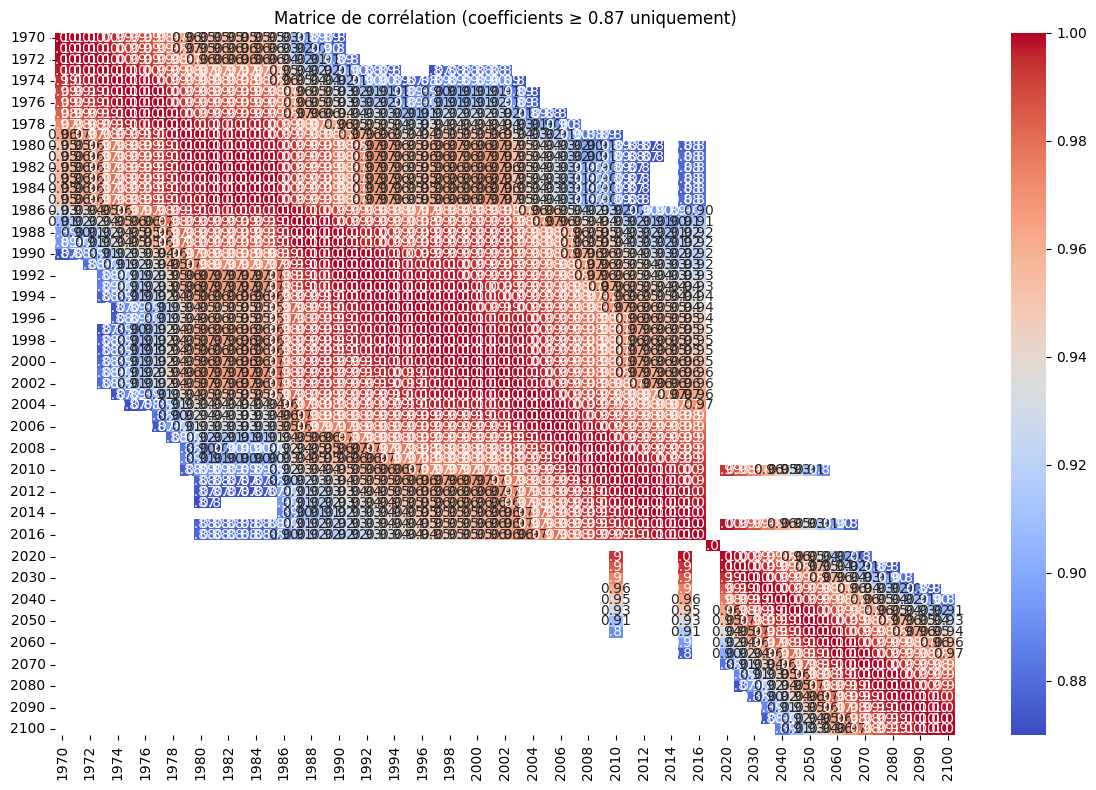

In [52]:
# 1. Garder uniquement les colonnes numériques
ed_data_num = ed_data_filtered.select_dtypes(include='number')

# 2. Calcul de la matrice de corrélation absolue
corr_matrix = ed_data_num.corr().abs()

# 3. Supprimer les valeurs < 0.77 (en les remplaçant par NaN)
filtered_corr = corr_matrix.where(corr_matrix >= 0.87)

# 4. Afficher la heatmap filtrée
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.87, vmax=1.0, mask=filtered_corr.isna(), cbar=True)
plt.title("Matrice de corrélation (coefficients ≥ 0.87 uniquement)")
plt.tight_layout()
plt.show()

Il est normal que les indices de corrélation des années > 2016 soient plus faibles : en effet, les données sont des données "projetées"

In [53]:
# Sélectionner les colonnes correspondant aux années entre 1970 et 2016
colonnes_annees = [col for col in ed_data_filtered.columns if col.isdigit() and 1970 <= int(col) <= 2016]

# Extraire uniquement ces colonnes
ed_data_years = ed_data_filtered[colonnes_annees].astype(float)

In [54]:
# Corrélation absolue
corr_matrix = ed_data_years.corr().abs()

# Supprimer les corrélations < 0.77
filtered_corr = corr_matrix.where(corr_matrix >= 0.77)


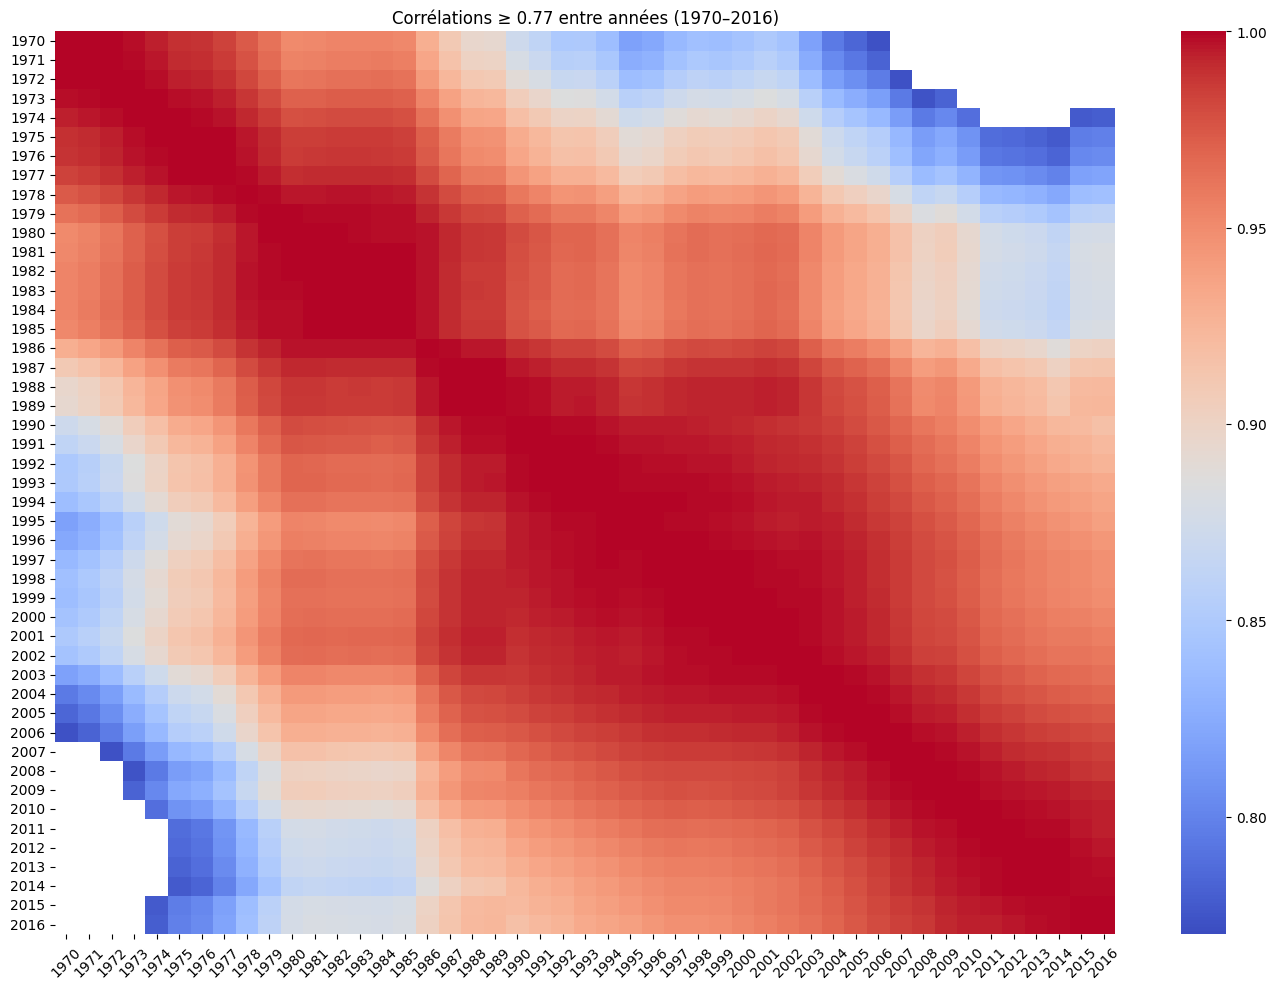

In [55]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    filtered_corr,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0.77,
    vmax=1.0,
    mask=filtered_corr.isna(),
    xticklabels=True,
    yticklabels=True
)

plt.title("Corrélations ≥ 0.77 entre années (1970–2016)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Plus l’écart entre les années comparées est grand, plus les corrélations tendent à diminuer. Cela s’explique par l’évolution des contextes économiques et sociaux, qui rend les indicateurs moins linéairement liés sur le long terme.**

### Taux de remplissage des colonnes

/tmp/ipykernel_24331/415409897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


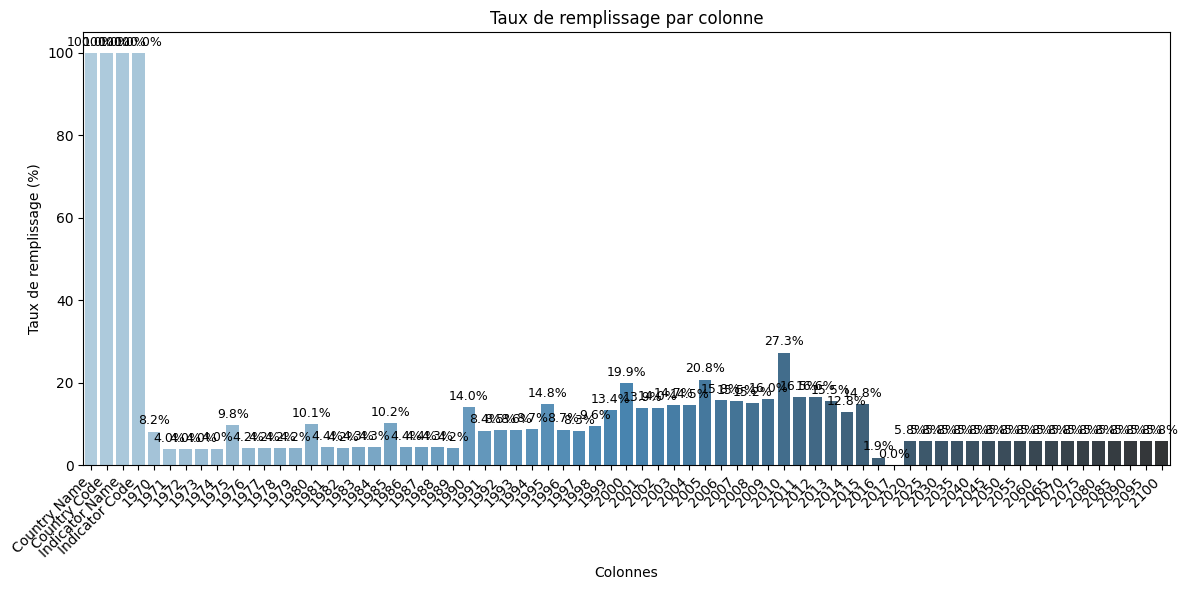

In [56]:
# 1. Calcul du taux de remplissage
taux = (ed_data_filtered.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
# Supposons que les colonnes années commencent à la colonne d'index 3 (après 'Country Code', 'Indicator Code', etc.)

years_cols = ed_data_filtered.columns[4:]

# Filtrer les lignes où TOUTES les colonnes années sont NaN
ed_data_clean = ed_data_filtered[~ed_data_filtered[years_cols].isna().all(axis=1)]

In [58]:
ed_data_clean.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_24331/1977958548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


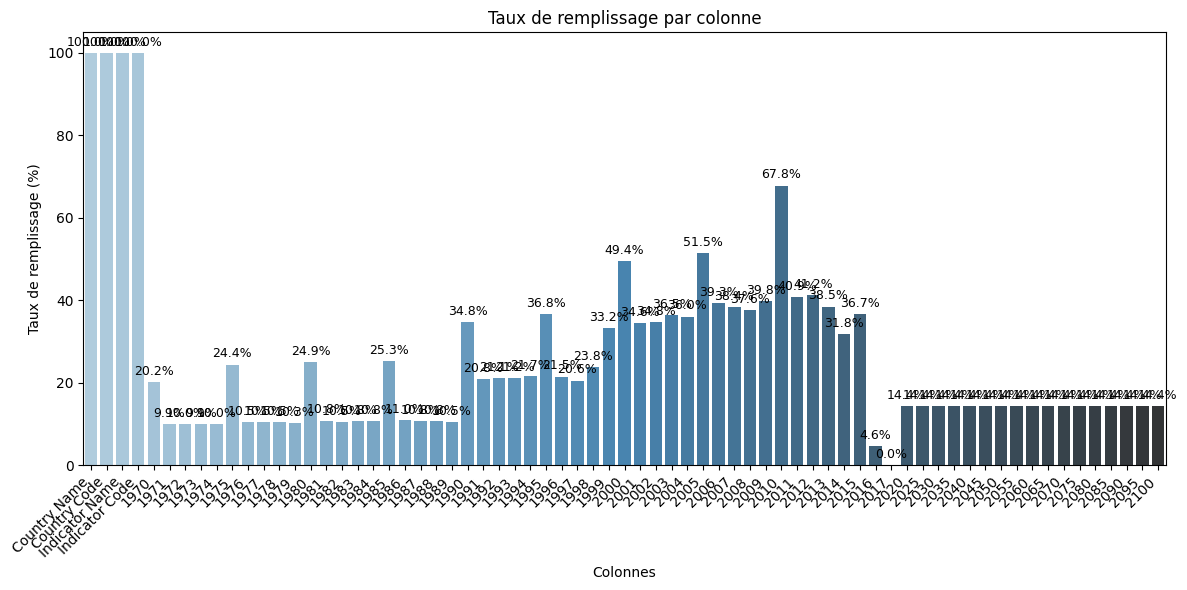

In [59]:
# 1. Calcul du taux de remplissage
taux = (ed_data_clean.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
ed_data_clean.shape

(357405, 69)

In [61]:
ed_data_all_rows = len(ed_data) - len(ed_data_clean)
ed_data_rows = len(ed_data_filtered) - len(ed_data_clean)
ed_data_len = len(ed_data_clean)
print(ed_data_all_rows, " lignes ont été supprimées",
      "depuis le début du filtrage du DF. Il reste ", ed_data_len, "lignes")

529525  lignes ont été supprimées depuis le début du filtrage du DF. Il reste  357405 lignes


## Analyse de foot_note

### Description de chaque ligne

In [62]:
foot_note_info = foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


CountryCode : le code indicatif de chaque pays  
SeriesCodes : le code Série de chaque pays  
Year : l'année sur laquelle les datas sont données  
DESCRIPTION : source des données  
Unnamed : 4: aucune info, rempli de NaN  

In [63]:
foot_note.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [64]:
foot_note.shape

(643638, 5)

Le DF foot_note  à **643838 lignes** & **5 colonnes**

### Calcul du nombre de doublons

In [65]:
foot_note.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [66]:
skim(foot_note)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 643638 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA        ┃ NA %    ┃ mean   ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 4       │    643638 │     100 │    nan │   nan │   nan │   nan │   nan │   nan │    nan │         │  │
│ └──────────────────┴───────────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                   643638 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                   643638 │  │
│ │ Year                      │       0 │          0 │                            1 │                   643638 │  │
│ │ Description               │       0 │          0 │                          3.4 │                  2186579 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

/tmp/ipykernel_24331/90869082.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


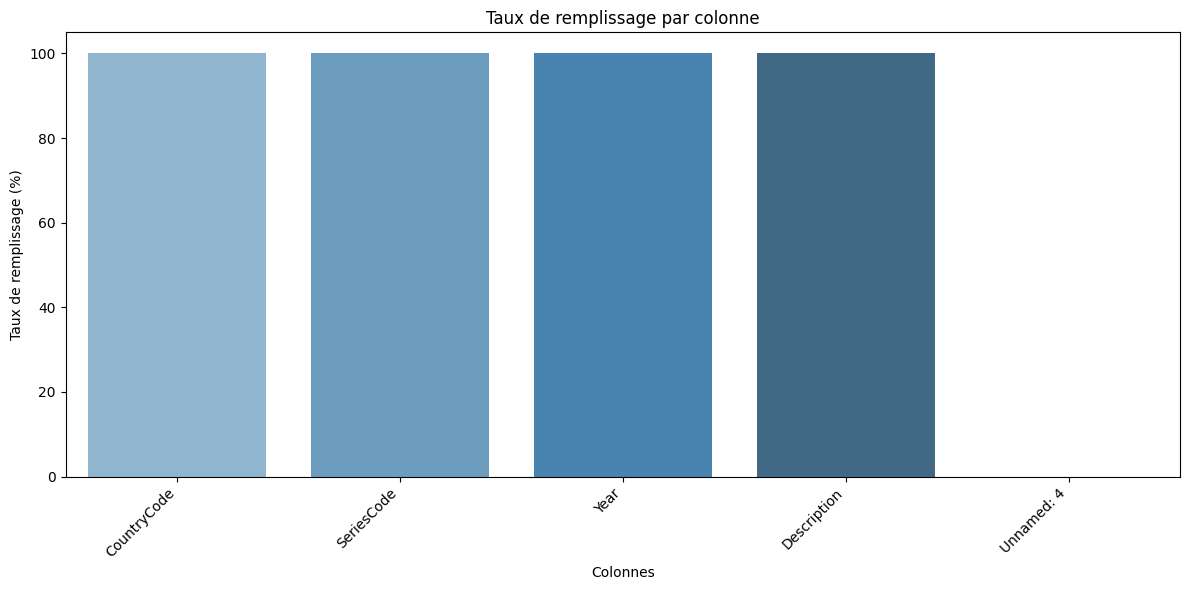

In [67]:
# 1. Calcul du taux de remplissage
taux = (foot_note.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les colonnes *CountryCode*, *SeriesCode*, *Year* et *DESCRIPTION* sont totalement remplies.  
La colonne *Unnamed :4* est totalement vide, on peut donc la supprimer.

In [68]:
foot_note_filtered = foot_note.drop("Unnamed: 4", axis=1)

In [69]:
foot_note_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'Description'], dtype='object')

La colonne **Unnamed :4**  a bien été supprimée.

In [70]:
foot_note_filtered.describe().T

,count,unique,top,freq
CountryCode,643638,239,LIC,7320
SeriesCode,643638,1558,SH.DYN.MORT,9226
Year,643638,56,YR2004,27128
Description,643638,9102,Country Data,191188


In [71]:
foot_note_filtered.value_counts("CountryCode")

CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

In [72]:
foot_note_filtered.value_counts("SeriesCode")

SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
UIS.XPubP.0                     1
UIS.XPubP.4                     1
UIS.XPubP.uk                    1
UIS.XSPENDP.1.FDPUB.FNCAP       1
UIS.XSPENDP.1.FDPUB.FNCUR       1
Name: count, Length: 1558, dtype: int64

In [73]:
foot_note_filtered.value_counts("Year")

Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
YR1991    11129
YR1993    11093
YR1990    10616
YR1986     9743
YR1985     9653
YR1989     9517
YR1981     9465
YR1984     9386
YR1988     9382
YR1987     9357
YR1983     9227
YR1982     9014
YR1980     8950
YR1979     8742
YR1976     8729
YR1972     8661
YR1975     8627
YR1977     8593
YR1978     8585
YR1973     8571
YR1974     8512
YR1971     8507
YR2015     6348
YR1970     5374
YR2016      819
YR2017      558
YR2035      144
YR2050      144
YR2045      144
YR2040      144
YR2030      140
YR2025      140
YR2020      140
yr2012       14
Name: count, dtype: int64

In [74]:
foot_note_filtered.value_counts("Description")

Description
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 171.4 - 193.5                     1
Uncertainty bound is 171.4 - 195.2                     1
Uncertainty bound is 171.5 - 185.1                     1
Uncertainty bound is 171.5 - 189.7                     1
Uncertainty bound is 171.1 - 192.8                     1
Name: count, Length: 9102, dtype: int64

In [75]:
foot_note_filtered.shape

(643638, 4)

## Analyse de ed_series

### Description de chaque ligne

In [76]:
ed_series_info = ed_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

CountryCode : le code indicatif de chaque pays  
SeriesCodes : le code Série de chaque pays  
DESCRIPTION : source des données  
Unnamed : aucune info, rempli de NaN  

### Nombre de lignes & colonnes 

In [77]:
ed_series.shape

(3665, 21)

Le DF country_series à **3665 lignes** & **21 colonnes**

### Calcul du nombre de doublons

In [78]:
ed_series.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [79]:
skim(ed_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3665   │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unit of measure            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Notes from original source │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Other web links            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Related indicators         │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ License Type               │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Unnamed: 20                │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Series Code                         │        0 │          0 │                       1 │               3668 │  │
│ │ Topic                               │        0 │          0 │                     1.6 │               6046 │  │
│ │ Indicator Name                      │        0 │          0 │                      11 │              41939 │  │
│ │ Short definition                    │     1509 │      41.17 │                      40 │             148277 │  │
│ │ Long definition                     │        0 │          0 │                      72 │             265471 │  │
│ │ Periodicity                         │     3566 │       97.3 │                   0.027 │                 99 │  │
│ │ Base Period                         │     3351 │      91.43 │                    0.34 │               1238 │  │
│ │ Other notes                         │     3113 │      84.94 │                    0.21 │                780 │  │
│ │ Aggregation method                  │     3618 │      98.72 │                   0.023 │                 84 │  │
│ │ Limitations and exceptions          │     3651 │      99.62 │                    0.54 │               1990 │  │
│ │ General comments                    │     3651 │      99.62 │                    0.12 │                447 │  │
│ │ Source                              │        0 │    

/tmp/ipykernel_24331/3276031438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


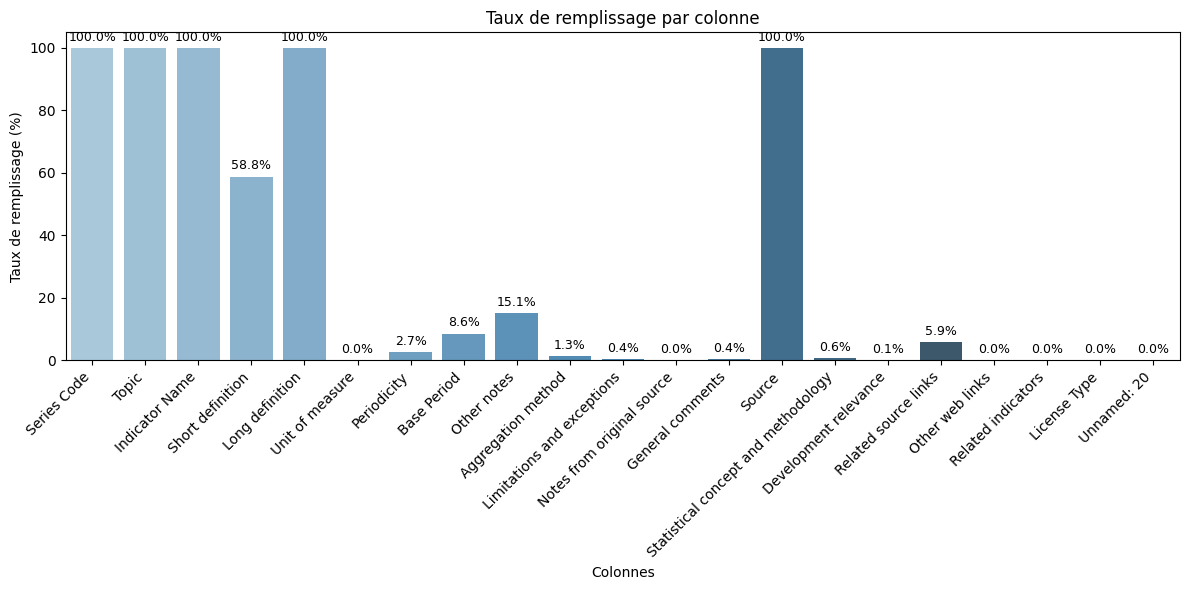

In [80]:
# 1. Calcul du taux de remplissage
taux = (ed_series.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut prendre pour hypothèse que les colonnes remplies à moins de 50% ne contiennent pas assez de valeurs exploitables.

In [81]:
ed_series_clean = ed_series.loc[:, ed_series.notnull().mean() >= 0.5]

In [82]:
ed_series_clean = ed_series_clean.drop("Short definition", axis=1)

In [83]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [84]:
ed_series_clean.shape

(3665, 5)

Il n'y a plus que **6 colonnes** au lieu de **22**

In [85]:
ed_series_clean.describe().T

,count,unique,top,freq
Series Code,3665,3665,XGDP.56.FSGOV.FDINSTADM.FFD,1
Topic,3665,37,Learning Outcomes,1046
Indicator Name,3665,3665,Government expenditure in tertiary institution...,1
Long definition,3665,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Source,3665,31,UNESCO Institute for Statistics,1269


In [86]:
ed_series_clean.value_counts("Series Code")

Series Code
XGDP.56.FSGOV.FDINSTADM.FFD    1
BAR.NOED.1519.FE.ZS            1
BAR.NOED.1519.ZS               1
BAR.NOED.15UP.FE.ZS            1
BAR.NOED.15UP.ZS               1
                              ..
BAR.NOED.5559.FE.ZS            1
BAR.NOED.5559.ZS               1
BAR.NOED.6064.FE.ZS            1
BAR.NOED.6064.ZS               1
BAR.NOED.6569.FE.ZS            1
Name: count, Length: 3665, dtype: int64

In [87]:
ed_series_clean.value_counts("Topic")

Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                  

In [88]:
ed_series_clean.value_counts("Indicator Name")

Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                  1
Adjusted net enrolment rate, lower secondary, both sexes (%)                                           1
Adjusted net enrolment rate, lower secondary, female (%)                                               1
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                1
Adjusted net enrolment rate, lower secondary, male (%)                                                 1
                                                                                                      ..
Adult literacy rate, population 15+ years, both sexes (%)                                              1
Adult literacy rate, population 15+ years, female (%)                                                  1
Adult literacy rate, population 15+ years, gender parity index (GPI)                                   1
Adult literacy rate, population 15+ year

In [89]:
ed_series_clean.value_counts("Long definition")

Long definition
Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       215
Percentage of students who w

In [90]:
ed_series_clean.value_counts("Source")

Source
UNESCO Institute for Statistics                                                                                                                                                                                                                                                                                                                                                                                                                                                             1269
Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/                                                                                                                                                                                                                                                                                                                                                                                                                 403
Robert J. Barro and Jong-Wha Le

## Nettoyage du DF Country

In [91]:
country_filtered.shape

(241, 22)

In [92]:
country_filtered_info = country_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Country Name                                       241 non-null    object 
 2   Special Notes                                      145 non-null    object 
 3   Region                                             214 non-null    object 
 4   Income Group                                       214 non-null    object 
 5   WB-2 code                                          240 non-null    object 
 6   National accounts base year                        205 non-null    object 
 7   SNA price valuation                                197 non-null    object 
 8   Lending category                                   144 non-null    object 
 9   System of 

In [93]:
len(country_filtered['Country Code'])

241

In [94]:
valid_codes = [c.alpha_3 for c in pycountry.countries]

### Première méthode avec liste des payx inexistants

In [95]:
false_country = country_filtered[~country_filtered['Country Code'].isin(valid_codes)]['Country Code'].unique().tolist()
false_country

['ARB',
 'CHI',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'EMU',
 'EUU',
 'HIC',
 'HPC',
 'LAC',
 'LCN',
 'LDC',
 'LIC',
 'LMC',
 'LMY',
 'MEA',
 'MIC',
 'MNA',
 'NAC',
 'OED',
 'SAS',
 'SSA',
 'SSF',
 'UMC',
 'WLD',
 'XKX']

In [96]:
country_clean = country_filtered[ ~country_filtered['Country Code'].isin(false_country) ]

In [97]:
country_clean.shape

(214, 22)

### Deuxième méthode avec merge

In [98]:
valid_codes_df = pd.DataFrame(valid_codes, columns=['Country Code'])

In [99]:
country_clean_v2 = country_filtered.merge(valid_codes_df, on='Country Code', how='inner')

In [100]:
country_clean_v2.shape

(214, 22)

#### Vérification

In [101]:
country_clean_sorted = country_clean.sort_values(by=country_clean.columns.tolist()).reset_index(drop=True)
country_clean_v2_sorted = country_clean_v2.sort_values(by=country_clean_v2.columns.tolist()).reset_index(drop=True)

country_clean_sorted.equals(country_clean_v2_sorted)


True

**Les deux dataframes sont bien identiques**

## Indicateurs à supprimer

Pour trouver quels indicateurs sont à supprimer, nous allons partir de **ed_series_clean**, qui contient les **Series Codes** et les **Topic** et **ed_data_clean** qui contient les **Indicator Code** et **Indicator Name**

# **OUBLI D'ENLEVER LES FAUX PAYS A FAIRE**

In [102]:
ed_series_clean = ed_series_clean.copy()
ed_data_clean = ed_data_clean.copy()

In [103]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [104]:
ed_data_clean.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

On peut créer un nouveau DF qui contient les colonnes **Country Name**, **Country Code**, **Indicator Code** , **Indicator Name** ainsi que toutes les années.

In [105]:
df_indicators = ed_data_clean.merge(ed_series_clean[['Indicator Name', 'Series Code', 'Topic']], on='Indicator Name', how='left')
df_indicators.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Series Code', 'Topic'],
      dtype='object')

In [106]:
df_indicators.shape

(357405, 71)

### Années

In [107]:
# Sélectionner les colonnes années
years_cols = [col for col in df_indicators.columns if col.isdigit()]

# Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_indicators[years_cols].notna().mean().sort_values(ascending=False)
years_proportion_completed 

2010    0.678340
2005    0.515124
2000    0.494330
2012    0.412037
2011    0.408534
          ...   
1972    0.099660
1973    0.099453
1971    0.099431
2016    0.046054
2017    0.000400
Length: 65, dtype: float64

In [123]:
# 1. Calcul du taux de remplissage
taux = (years_proportion_completed.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']


/tmp/ipykernel_24331/1037316630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')


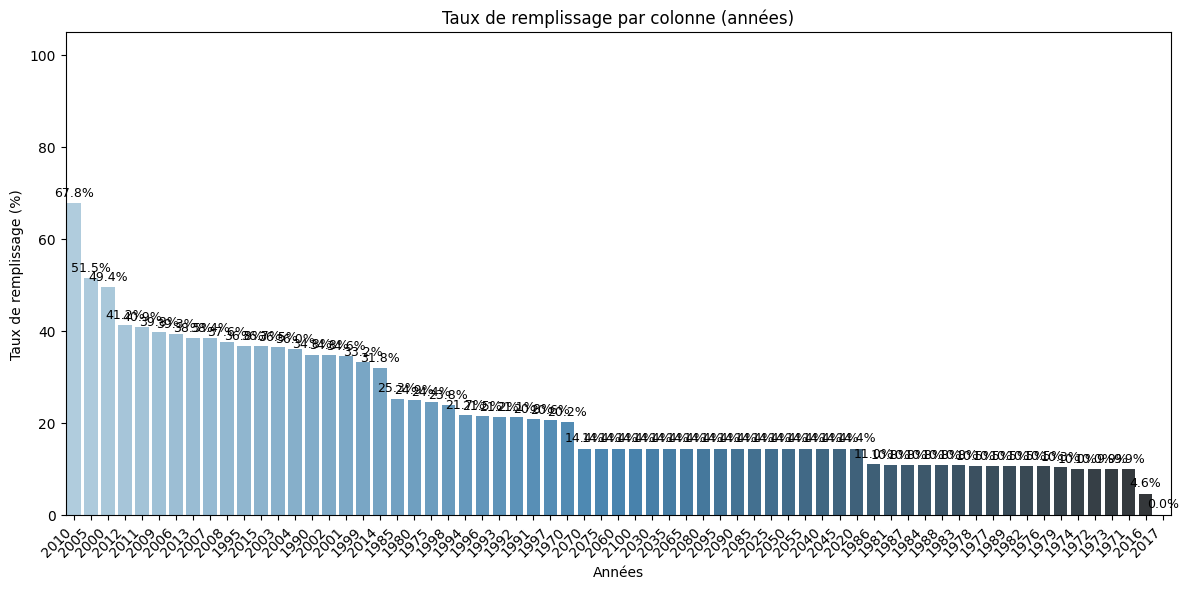

In [124]:
# 1. Sélectionner les colonnes années
years_cols = [col for col in df_indicators.columns if col.isdigit()]

# 2. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_indicators[years_cols].notna().mean().sort_values(ascending=False)

# 3. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Les données à partir de **2020** sont des projections. Celles au-delà de 2040 présentent un niveau d’incertitude élevé, rendant leur interprétation et leur exploitation moins fiables dans le cadre d’une prise de décision concrète.  
Ainsi, les années postérieures à **2040** sont exclues de l’analyse, car leur précision ne permet pas de tirer des conclusions robustes pour le projet d’expansion de la plateforme.  
On peut également se ddire que les années **<1990** sont trop anciennes pour avoir des data utiles, vis à vis des situations économiques des pays.

In [125]:
# 1. Construire la liste des années à supprimer : celles < 1990 et celles > 2040
years_to_delete = list(np.arange(1970, 1990)) + list(np.arange(2041, 2101))

# 2. Convertir ces années en chaînes (car les colonnes sont des strings)
years_to_delete_str = [str(year) for year in years_to_delete]

# 3. Filtrer les colonnes à supprimer en utilisant isin() + ~ (inverse) pour garder les autres
cols_to_keep = [col for col in df_indicators.columns if not col.isdigit() or col not in years_to_delete_str]

# 4. Créer un nouveau DataFrame avec ces colonnes
df_indicators_filtered = df_indicators[cols_to_keep]

# Vérifier le résultat
df_indicators_filtered.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2020', '2025', '2030', '2035', '2040', 'Series Code', 'Topic',
       '%yearcompleted'],
      dtype='object')

### Les Topic

In [110]:
topic_list = df_indicators['Topic'].dropna().unique()
topic_list

array(['Primary', 'Literacy', 'Secondary', 'Early Childhood Education',
       'Tertiary', 'Post-Secondary/Non-Tertiary',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure', 'Teachers',
       'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors',
       'Expenditures', 'Attainment', 'Education Equality', 'Background',
       'Education Management Information Systems (SABER)',
       'Learning Outcomes', 'Early Child Development (SABER)', 'EMIS',
       'Student Assessment (SABER)',
       'School Health and School Feeding (SABER)',
       'Workforce Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'Tertiary Educa

Mark veut étendre *academy* , un site de formation en ligne pour les lycéens et  + . On peut donc supprimer toutes les colonnes qui ne sont pas en lien avec l'éducation.

In [111]:
topic_to_keep = [
    'Secondary',
    'Tertiary',
    'Post-Secondary/Non-Tertiary',
    'Literacy',
    'Attainment',
    'Education Equality',
    'Learning Outcomes',
    'Teachers'
]

df_indicators_filtered = df_indicators[df_indicators['Topic'].isin(topic_to_keep)]

In [112]:
number_topic = df_indicators_filtered['Topic'].unique()
print(" Il reste ",len(number_topic), " Topic")

 Il reste  8  Topic


In [113]:
df_indicators_filtered.shape

(194018, 72)

In [114]:
diff_len = len(df_indicators) - len(df_indicators_filtered)
print(diff_len, " lignes ont été supprimées")

163387  lignes ont été supprimées


### Les Indicators

Regardons maintenant la liste des **Indicators Name** et **Indicator Code**

In [115]:
indicators_list = df_indicators_filtered['Indicator Name'].dropna().unique()
indicators_list

array(['Adult illiterate population, 15+ years, % female',
       'Adult illiterate population, 15+ years, both sexes (number)',
       'Adult illiterate population, 15+ years, female (number)', ...,
       'EGRA: Reading Comprehension - Share of students with a zero score (%). Lunda. 2nd Grade',
       'EGRA: Reading Comprehension - Share of students with a zero score (%). Luvale. 2nd Grade',
       'EGRA: Reading Comprehension - Share of students with a zero score (%). Silozi. 2nd Grade'],
      dtype=object)

In [116]:
indicators_list_df = pd.DataFrame(df_indicators_filtered['Indicator Name'].unique(), columns=['Indicator Name'])
display(indicators_list_df)

,Indicator Name
0,"Adult illiterate population, 15+ years, % female"
1,"Adult illiterate population, 15+ years, both s..."
2,"Adult illiterate population, 15+ years, female..."
3,"Adult illiterate population, 15+ years, male (..."
4,"Adult literacy rate, population 15+ years, bot..."
...,...
2450,EGRA: Reading Comprehension - Share of student...
2451,EGRA: Reading Comprehension - Share of student...
2452,EGRA: Reading Comprehension - Share of student...
2453,EGRA: Reading Comprehension - Share of student...


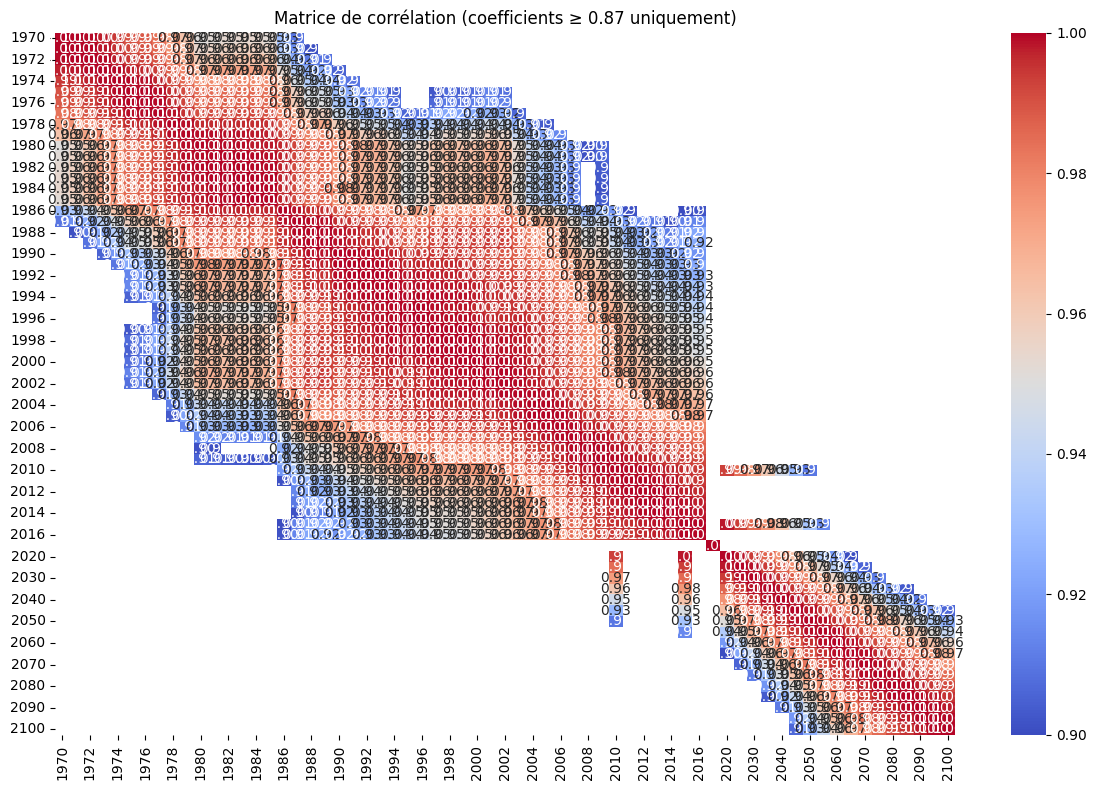

In [117]:
# 1. Garder uniquement les colonnes numériques
ed_data_years = ed_data_clean.select_dtypes(include='number')

# 2. Calcul de la matrice de corrélation absolue
corr_matrix = ed_data_years.corr().abs()

# 3. Supprimer les valeurs < 0.9 (en les remplaçant par NaN)
filtered_corr = corr_matrix.where(corr_matrix >= 0.9)

# 4. Afficher la heatmap filtrée
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.9, vmax=1.0, mask=filtered_corr.isna(), cbar=True)
plt.title("Matrice de corrélation (coefficients ≥ 0.87 uniquement)")
plt.tight_layout()
plt.show()